In [91]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
# 윈저사이저 적용
df = pd.read_csv('../데이터자료//label지정.csv', encoding='CP949')
df.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', 'month'],axis=1,inplace=True)
for col in df.columns:
     df[col] = winsorize(df[col], limits= 0.01)

In [93]:
# Data set1 MDA로 선정된 피처들 분리
df = df.sort_values(["year"],ascending=True)
# df_data = df[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]순운전자본비율',
#               '[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
# df_data_scaled= StandardScaler().fit_transform(df_data)
# df_data_scaled= MinMaxScaler().fit_transform(df_data)
# df_data_scaled = pd.DataFrame(df_data_scaled)
# df_data_scaled.columns =[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율',
# '[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
# df[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율',
# '[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']] = df_data_scaled[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
df =df.reset_index(drop="index")
df.head()

,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,[제조]매출액총이익률,[제조]매출액순이익률,...,[제조]설비투자효율,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,label
0,56.40,-5.90,-12.89,1.98,-2.02,17.64,-78.28,-1.43,41.83,-8.50,...,35.86,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,0
1,-1.41,-6.94,-5.45,-0.25,-1.44,4.52,-32.13,32.57,46.33,5.97,...,705.44,0.00,39.01,45.08,54.92,15.30,17.44,19.13,2011,0
2,-6.84,0.00,1.61,3.11,21.79,4.78,-4.38,4.46,21.81,6.67,...,45.60,90.22,26.34,34.64,65.36,25.33,1.72,2.39,2011,0
3,38.02,-0.28,-6.99,1.83,3.74,4.69,0.00,-76.06,22.83,1.20,...,481.09,0.00,20.74,85.32,14.68,5.77,22.67,4.26,2011,0
4,244.00,184.49,95.92,187.78,100.71,261.04,848.10,499.60,13.35,11.09,...,120.05,6317.93,20.51,43.84,56.16,54.05,8.56,2.93,2011,0


In [94]:
# train test set 분리
df1 = df[df['year']<2019] #train
df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
X_train= df1[["[제조]순운전자본회전률","[제조]총자본증가율","[제조]부가가치율","[제조]총자본순이익률",
           "[제조]유동비율","[제조]1주당매출액","[제조]비유동자산회전률"]]
X_test = df2[["[제조]순운전자본회전률","[제조]총자본증가율","[제조]부가가치율","[제조]총자본순이익률",
           "[제조]유동비율","[제조]1주당매출액","[제조]비유동자산회전률"]]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

,[제조]순운전자본회전률,[제조]총자본증가율,[제조]부가가치율,[제조]총자본순이익률,[제조]유동비율,[제조]1주당매출액,[제조]비유동자산회전률
count,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000
mean,0.920986,13.330016,14.776432,-1.935021,325.402384,9335.802369,2.096412
std,0.523533,34.928019,52.796275,14.466209,383.642695,14544.752614,2.135802
min,0.090000,-47.320000,-255.080000,-60.810000,28.410000,122.700000,0.120000
25%,0.550000,-3.090000,11.585000,-5.600000,113.175000,1605.230000,0.840000
50%,0.870000,5.720000,22.620000,1.400000,186.160000,4703.340000,1.450000
75%,1.210000,18.880000,37.070000,5.955000,361.535000,10931.755000,2.510000
max,2.810000,187.780000,85.720000,24.200000,2214.570000,108670.230000,14.140000


In [95]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [96]:
from sklearn.model_selection import GridSearchCV


In [97]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [98]:
# # 디시전트리 하이퍼파라미터 구하기
# tree = DecisionTreeClassifier()

# # 딕셔너리로 전달
# # key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
# param_grid = {
#     'max_depth':[2,3,4,5,6,7,8], #7개
#     'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
# }
# grid_search = GridSearchCV(tree
#                           , param_grid = param_grid
#                           , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
#                           , n_jobs = -1)  #-1: 모든 코어 사용

# grid_search.fit(X_train, y_train)

# # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 5}, 최적 평균 정확도 :0.982


In [99]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#최적 하이퍼 파라미터 :{'max_depth': 3,'min_samples_leaf': 5}, 최적 평균 정확도 :0.984
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 5,min_samples_leaf=10)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [100]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [101]:
# # 하이퍼파라미터 Grid-Search
# from sklearn.model_selection import GridSearchCV

# # 탐색 범위 정의
# grid_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': [2,4,6,8],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [4,6,8.10],
#                'min_samples_split': [4,6,8,10],
#                'n_estimators': [20,40,60,80,100]}

# model = RandomForestClassifier()
# grid = GridSearchCV(estimator = model, param_grid = grid_search, 
#                                cv = 4,verbose=0, n_jobs = -1)
# grid.fit(X_train,y_train)

# # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 3최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 40}, 최적 평균 정확도 :0.984


In [102]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 
# 'min_samples_split': 4, 'n_estimators': 40}, 최적 평균 정확도 :0.984
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'auto',
                                     max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=40)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

In [103]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

최적 하이퍼 파라미어:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.983


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.1, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [115]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(knn_X_train, y_train)
    knn_pred = knn_clf.predict(knn_X_test)
    knn_score=accuracy_score(y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.975457732761979
2
0.9867549668874173
3
0.983638488507986
4
0.9867549668874173
5
0.9855862874951306
6
0.9871445266848461
7
0.9863654070899883
8
0.9867549668874173
9
0.9867549668874173
10
0.9883132060771328


In [116]:
# knn 최적의 파라미터 모델 6에서 제일 높음
knn_clf = KNeighborsClassifier(n_neighbors=6)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [117]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[["[제조]순운전자본회전률","[제조]총자본증가율","[제조]부가가치율","[제조]총자본순이익률",
           "[제조]유동비율","[제조]1주당매출액","[제조]비유동자산회전률"]]
X_train_XG.columns = [["순운전자본회전률","총자본증가율","부가가치율","총자본순이익률",
           "유동비율","1주당매출액","비유동자산회전률"]]
X_test_XG = df2[["[제조]순운전자본회전률","[제조]총자본증가율","[제조]부가가치율","[제조]총자본순이익률",
           "[제조]유동비율","[제조]1주당매출액","[제조]비유동자산회전률"]]
X_test_XG.columns =[["순운전자본회전률","총자본증가율","부가가치율","총자본순이익률",
           "유동비율","1주당매출액","비유동자산회전률"]]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




[17:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [118]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[20,40,60,80,100],
          'learning_rate':[0.03,0.05,0.07,0.09],
          'max_depth' : [4,6,8,10]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train_XG,y_train_XG)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

[17:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false al

In [112]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 60}, 최적 평균 정확도:0.982
xgb_wrapper = XGBClassifier(learning_rate= 0.05, max_depth= 4, n_estimators= 60)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

In [113]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [119]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(X_train, y_train)
    pc_pred = pc_clf.predict(X_test)
    
    pc_scores=accuracy_score(y_test, pc_pred)
    print(i)
    print(pc_scores)


1
0.987923646279704
2
0.9805220101285548
3
0.9750681729645501
4
0.9801324503311258
5
0.9844176081028437
6
0.9840280483054149
7
0.9848071679002727
8
0.9824698091156993
9
0.9774055317491235
10
0.983638488507986


In [120]:
# 퍼셉트론 최적의 파라미터 7이제일큼
pc_clf = Perceptron(n_iter = 7)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [121]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2427  110]
 [  21    9]]
정확도: 0.9490, 정밀도 : 0.0756, 재현율:0.3000,F1 스코어:0.1208
ROC 스코어: 0.6283, PR score : 0.0309
None
디시전트리
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.6207, PR score : 0.0382
None
디시전트리 최적의 모델
오차행렬
[[2521   16]
 [  27    3]]
정확도: 0.9832, 정밀도 : 0.1579, 재현율:0.1000,F1 스코어:0.1224
ROC 스코어: 0.5468, PR score : 0.0263
None
랜덤포레스트
오차행렬
[[2532    5]
 [  27    3]]
정확도: 0.9875, 정밀도 : 0.3750, 재현율:0.1000,F1 스코어:0.1579
ROC 스코어: 0.5490, PR score : 0.0480
None
랜덤포레스트 최적의 모델
오차행렬
[[2534    3]
 [  30    0]]
정확도: 0.9871, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4994, PR score : 0.0117
None
로지스틱
오차행렬
[[2523   14]
 [  28    2]]
정확도: 0.9836, 정밀도 : 0.1250, 재현율:0.0667,F1 스코어:0.0870
ROC 스코어: 0.5306, PR score : 0.0192
None
로지스틱회귀 최적의 모델
오차행렬
[[2529    8]
 [  28    2]]
정확도: 0.9860, 정밀도 : 0.2000, 재현율:0.0667,F1 스코어:0.1000
ROC 스코어: 0.5318, PR score : 0.0242
None
Knn
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.

In [122]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.1 
get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2340  197]
 [  17   13]]
정확도: 0.9166, 정밀도 : 0.0619, 재현율:0.4333,F1 스코어:0.1083
ROC 스코어: 0.6778, PR score : 0.0334
임곗값: 0.2
오차행렬
[[2380  157]
 [  20   10]]
정확도: 0.9310, 정밀도 : 0.0599, 재현율:0.3333,F1 스코어:0.1015
ROC 스코어: 0.6357, PR score : 0.0278
임곗값: 0.3
오차행렬
[[2408  129]
 [  20   10]]
정확도: 0.9420, 정밀도 : 0.0719, 재현율:0.3333,F1 스코어:0.1183
ROC 스코어: 0.6412, PR score : 0.0318
임곗값: 0.4
오차행렬
[[2415  122]
 [  20   10]]
정확도: 0.9447, 정밀도 : 0.0758, 재현율:0.3333,F1 스코어:0.1235
ROC 스코어: 0.6426, PR score : 0.0330
임곗값: 0.5
오차행렬
[[2427  110]
 [  21    9]]
정확도: 0.9490, 정밀도 : 0.0756, 재현율:0.3000,F1 스코어:0.1208
ROC 스코어: 0.6283, PR score : 0.0309
임곗값: 0.6
오차행렬
[[2438   99]
 [  21    9]]
정확도: 0.9533, 정밀도 : 0.0833, 재현율:0.3000,F1 스코어:0.1304
ROC 스코어: 0.6305, PR score : 0.0332
임곗값: 0.7
오차행렬
[[2447   90]
 [  22    8]]
정확도: 0.9564, 정밀도 : 0.0816, 재현율:0.2667,F1 스코어:0.1250
ROC 스코어: 0.6156, PR score : 0.0303
임곗값: 0.8
오차행렬
[[2461   76]
 [  23    7]]
정확도: 0.9614, 정밀도 : 0.0843, 재현율:0.2333,F1 스코어:0.1239
ROC 스코어: 0.

In [123]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.6207, PR score : 0.0382
임곗값: 0.2
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.6207, PR score : 0.0382
임곗값: 0.3
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.6207, PR score : 0.0382
임곗값: 0.4
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.6207, PR score : 0.0382
임곗값: 0.5
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.6207, PR score : 0.0382
임곗값: 0.6
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.6207, PR score : 0.0382
임곗값: 0.7
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.6207, PR score : 0.0382
임곗값: 0.8
오차행렬
[[2473   64]
 [  22    8]]
정확도: 0.9665, 정밀도 : 0.1111, 재현율:0.2667,F1 스코어:0.1569
ROC 스코어: 0.

In [124]:
# 디시전트리 최적
# 임계값 0.3 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2438   99]
 [  19   11]]
정확도: 0.9540, 정밀도 : 0.1000, 재현율:0.3667,F1 스코어:0.1571
ROC 스코어: 0.6638, PR score : 0.0441
임곗값: 0.2
오차행렬
[[2491   46]
 [  23    7]]
정확도: 0.9731, 정밀도 : 0.1321, 재현율:0.2333,F1 스코어:0.1687
ROC 스코어: 0.6076, PR score : 0.0398
임곗값: 0.3
오차행렬
[[2512   25]
 [  24    6]]
정확도: 0.9809, 정밀도 : 0.1935, 재현율:0.2000,F1 스코어:0.1967
ROC 스코어: 0.5951, PR score : 0.0481
임곗값: 0.4
오차행렬
[[2517   20]
 [  26    4]]
정확도: 0.9821, 정밀도 : 0.1667, 재현율:0.1333,F1 스코어:0.1481
ROC 스코어: 0.5627, PR score : 0.0324
임곗값: 0.5
오차행렬
[[2521   16]
 [  27    3]]
정확도: 0.9832, 정밀도 : 0.1579, 재현율:0.1000,F1 스코어:0.1224
ROC 스코어: 0.5468, PR score : 0.0263
임곗값: 0.6
오차행렬
[[2523   14]
 [  28    2]]
정확도: 0.9836, 정밀도 : 0.1250, 재현율:0.0667,F1 스코어:0.0870
ROC 스코어: 0.5306, PR score : 0.0192
임곗값: 0.7
오차행렬
[[2523   14]
 [  28    2]]
정확도: 0.9836, 정밀도 : 0.1250, 재현율:0.0667,F1 스코어:0.0870
ROC 스코어: 0.5306, PR score : 0.0192
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
#로지스틱 회귀
#0.1 때 F1 스코어가 제일 좋음
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2443   94]
 [  16   14]]
정확도: 0.9571, 정밀도 : 0.1296, 재현율:0.4667,F1 스코어:0.2029
ROC 스코어: 0.7148, PR score : 0.0667
임곗값: 0.2
오차행렬
[[2493   44]
 [  22    8]]
정확도: 0.9743, 정밀도 : 0.1538, 재현율:0.2667,F1 스코어:0.1951
ROC 스코어: 0.6247, PR score : 0.0496
임곗값: 0.3
오차행렬
[[2506   31]
 [  25    5]]
정확도: 0.9782, 정밀도 : 0.1389, 재현율:0.1667,F1 스코어:0.1515
ROC 스코어: 0.5772, PR score : 0.0329
임곗값: 0.4
오차행렬
[[2518   19]
 [  27    3]]
정확도: 0.9821, 정밀도 : 0.1364, 재현율:0.1000,F1 스코어:0.1154
ROC 스코어: 0.5463, PR score : 0.0242
임곗값: 0.5
오차행렬
[[2523   14]
 [  28    2]]
정확도: 0.9836, 정밀도 : 0.1250, 재현율:0.0667,F1 스코어:0.0870
ROC 스코어: 0.5306, PR score : 0.0192
임곗값: 0.6
오차행렬
[[2531    6]
 [  29    1]]
정확도: 0.9864, 정밀도 : 0.1429, 재현율:0.0333,F1 스코어:0.0541
ROC 스코어: 0.5155, PR score : 0.0161
임곗값: 0.7
오차행렬
[[2534    3]
 [  30    0]]
정확도: 0.9871, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4994, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
# 로지 회귀 최적 파라미터
# 임계값 0.3일때 F1 스코어 최대
get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2385  152]
 [  12   18]]
정확도: 0.9361, 정밀도 : 0.1059, 재현율:0.6000,F1 스코어:0.1800
ROC 스코어: 0.7700, PR score : 0.0682
임곗값: 0.2
오차행렬
[[2482   55]
 [  18   12]]
정확도: 0.9716, 정밀도 : 0.1791, 재현율:0.4000,F1 스코어:0.2474
ROC 스코어: 0.6892, PR score : 0.0787
임곗값: 0.3
오차행렬
[[2513   24]
 [  22    8]]
정확도: 0.9821, 정밀도 : 0.2500, 재현율:0.2667,F1 스코어:0.2581
ROC 스코어: 0.6286, PR score : 0.0752
임곗값: 0.4
오차행렬
[[2521   16]
 [  25    5]]
정확도: 0.9840, 정밀도 : 0.2381, 재현율:0.1667,F1 스코어:0.1961
ROC 스코어: 0.5802, PR score : 0.0494
임곗값: 0.5
오차행렬
[[2529    8]
 [  28    2]]
정확도: 0.9860, 정밀도 : 0.2000, 재현율:0.0667,F1 스코어:0.1000
ROC 스코어: 0.5318, PR score : 0.0242
임곗값: 0.6
오차행렬
[[2531    6]
 [  29    1]]
정확도: 0.9864, 정밀도 : 0.1429, 재현율:0.0333,F1 스코어:0.0541
ROC 스코어: 0.5155, PR score : 0.0161
임곗값: 0.7
오차행렬
[[2536    1]
 [  30    0]]
정확도: 0.9879, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4998, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
#랜덤 포레스트
# 임계값 0.3일 때 F1스코어 최대
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2402  135]
 [  15   15]]
정확도: 0.9416, 정밀도 : 0.1000, 재현율:0.5000,F1 스코어:0.1667
ROC 스코어: 0.7234, PR score : 0.0558
임곗값: 0.2
오차행렬
[[2495   42]
 [  20   10]]
정확도: 0.9758, 정밀도 : 0.1923, 재현율:0.3333,F1 스코어:0.2439
ROC 스코어: 0.6584, PR score : 0.0719
임곗값: 0.3
오차행렬
[[2521   16]
 [  23    7]]
정확도: 0.9848, 정밀도 : 0.3043, 재현율:0.2333,F1 스코어:0.2642
ROC 스코어: 0.6135, PR score : 0.0800
임곗값: 0.4
오차행렬
[[2526   11]
 [  26    4]]
정확도: 0.9856, 정밀도 : 0.2667, 재현율:0.1333,F1 스코어:0.1778
ROC 스코어: 0.5645, PR score : 0.0457
임곗값: 0.5
오차행렬
[[2532    5]
 [  27    3]]
정확도: 0.9875, 정밀도 : 0.3750, 재현율:0.1000,F1 스코어:0.1579
ROC 스코어: 0.5490, PR score : 0.0480
임곗값: 0.6
오차행렬
[[2535    2]
 [  29    1]]
정확도: 0.9879, 정밀도 : 0.3333, 재현율:0.0333,F1 스코어:0.0606
ROC 스코어: 0.5163, PR score : 0.0224
임곗값: 0.7
오차행렬
[[2536    1]
 [  30    0]]
정확도: 0.9879, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4998, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.2일 때 최대
get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2437  100]
 [  15   15]]
정확도: 0.9552, 정밀도 : 0.1304, 재현율:0.5000,F1 스코어:0.2069
ROC 스코어: 0.7303, PR score : 0.0711
임곗값: 0.2
오차행렬
[[2512   25]
 [  20   10]]
정확도: 0.9825, 정밀도 : 0.2857, 재현율:0.3333,F1 스코어:0.3077
ROC 스코어: 0.6617, PR score : 0.1030
임곗값: 0.3
오차행렬
[[2525   12]
 [  23    7]]
정확도: 0.9864, 정밀도 : 0.3684, 재현율:0.2333,F1 스코어:0.2857
ROC 스코어: 0.6143, PR score : 0.0949
임곗값: 0.4
오차행렬
[[2530    7]
 [  27    3]]
정확도: 0.9868, 정밀도 : 0.3000, 재현율:0.1000,F1 스코어:0.1500
ROC 스코어: 0.5486, PR score : 0.0405
임곗값: 0.5
오차행렬
[[2534    3]
 [  30    0]]
정확도: 0.9871, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4994, PR score : 0.0117
임곗값: 0.6
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.7
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local

In [129]:
#knn 
#임계값 0.0일때 최대
get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2534    3]
 [  30    0]]
정확도: 0.9871, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4994, PR score : 0.0117
임곗값: 0.2
오차행렬
[[2535    2]
 [  30    0]]
정확도: 0.9875, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4996, PR score : 0.0117
임곗값: 0.3
오차행렬
[[2535    2]
 [  30    0]]
정확도: 0.9875, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4996, PR score : 0.0117
임곗값: 0.4
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.5
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.6
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.7
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local

In [130]:
#knn 최적 파라미터 적용
#임계값. 0.0
get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2535    2]
 [  30    0]]
정확도: 0.9875, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4996, PR score : 0.0117
임곗값: 0.2
오차행렬
[[2535    2]
 [  30    0]]
정확도: 0.9875, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4996, PR score : 0.0117
임곗값: 0.3
오차행렬
[[2536    1]
 [  30    0]]
정확도: 0.9879, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4998, PR score : 0.0117
임곗값: 0.4
오차행렬
[[2536    1]
 [  30    0]]
정확도: 0.9879, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.4998, PR score : 0.0117
임곗값: 0.5
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.6
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.7
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local

In [131]:
#xgb 
#입계값 0.2일 때 최대
get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2503   34]
 [  21    9]]
정확도: 0.9786, 정밀도 : 0.2093, 재현율:0.3000,F1 스코어:0.2466
ROC 스코어: 0.6433, PR score : 0.0710
임곗값: 0.2
오차행렬
[[2514   23]
 [  22    8]]
정확도: 0.9825, 정밀도 : 0.2581, 재현율:0.2667,F1 스코어:0.2623
ROC 스코어: 0.6288, PR score : 0.0774
임곗값: 0.3
오차행렬
[[2519   18]
 [  23    7]]
정확도: 0.9840, 정밀도 : 0.2800, 재현율:0.2333,F1 스코어:0.2545
ROC 스코어: 0.6131, PR score : 0.0743
임곗값: 0.4
오차행렬
[[2522   15]
 [  25    5]]
정확도: 0.9844, 정밀도 : 0.2500, 재현율:0.1667,F1 스코어:0.2000
ROC 스코어: 0.5804, PR score : 0.0514
임곗값: 0.5
오차행렬
[[2525   12]
 [  26    4]]
정확도: 0.9852, 정밀도 : 0.2500, 재현율:0.1333,F1 스코어:0.1739
ROC 스코어: 0.5643, PR score : 0.0435
임곗값: 0.6
오차행렬
[[2528    9]
 [  27    3]]
정확도: 0.9860, 정밀도 : 0.2500, 재현율:0.1000,F1 스코어:0.1429
ROC 스코어: 0.5482, PR score : 0.0355
임곗값: 0.7
오차행렬
[[2530    7]
 [  27    3]]
정확도: 0.9868, 정밀도 : 0.3000, 재현율:0.1000,F1 스코어:0.1500
ROC 스코어: 0.5486, PR score : 0.0405
임곗값: 0.8
오차행렬
[[2532    5]
 [  28    2]]
정확도: 0.9871, 정밀도 : 0.2857, 재현율:0.0667,F1 스코어:0.1081
ROC 스코어: 0.

In [132]:
# xgb 최적 파라미터 적용
# 임계값 0.2일때 최대
get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2431  106]
 [  16   14]]
정확도: 0.9525, 정밀도 : 0.1167, 재현율:0.4667,F1 스코어:0.1867
ROC 스코어: 0.7124, PR score : 0.0607
임곗값: 0.2
오차행렬
[[2509   28]
 [  19   11]]
정확도: 0.9817, 정밀도 : 0.2821, 재현율:0.3667,F1 스코어:0.3188
ROC 스코어: 0.6778, PR score : 0.1108
임곗값: 0.3
오차행렬
[[2522   15]
 [  22    8]]
정확도: 0.9856, 정밀도 : 0.3478, 재현율:0.2667,F1 스코어:0.3019
ROC 스코어: 0.6304, PR score : 0.1013
임곗값: 0.4
오차행렬
[[2524   13]
 [  24    6]]
정확도: 0.9856, 정밀도 : 0.3158, 재현율:0.2000,F1 스코어:0.2449
ROC 스코어: 0.5974, PR score : 0.0725
임곗값: 0.5
오차행렬
[[2530    7]
 [  26    4]]
정확도: 0.9871, 정밀도 : 0.3636, 재현율:0.1333,F1 스코어:0.1951
ROC 스코어: 0.5653, PR score : 0.0586
임곗값: 0.6
오차행렬
[[2531    6]
 [  26    4]]
정확도: 0.9875, 정밀도 : 0.4000, 재현율:0.1333,F1 스코어:0.2000
ROC 스코어: 0.5655, PR score : 0.0635
임곗값: 0.7
오차행렬
[[2531    6]
 [  29    1]]
정확도: 0.9864, 정밀도 : 0.1429, 재현율:0.0333,F1 스코어:0.0541
ROC 스코어: 0.5155, PR score : 0.0161
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


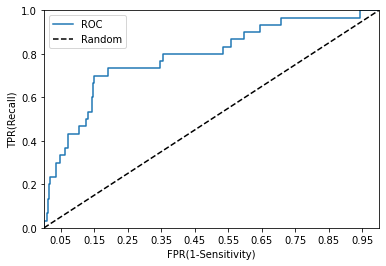

lda의 ROC AUC값: 0.7880


In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


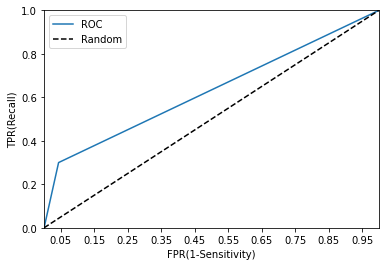

lda의 ROC AUC값: 0.6283


In [134]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

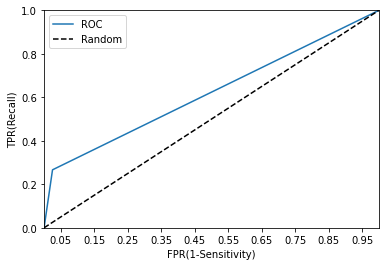

dt ROC AUC값: 0.6207


In [135]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


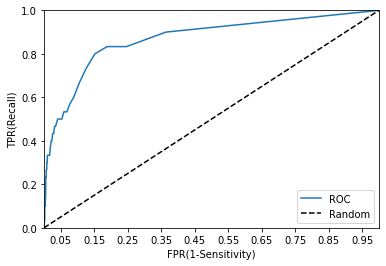

rf ROC AUC값: 0.8695


In [136]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

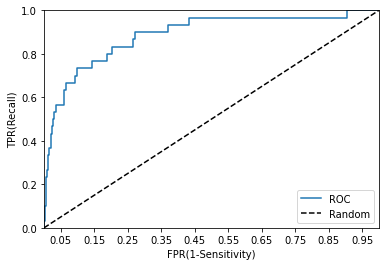

lr ROC AUC값: 0.8869


In [137]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


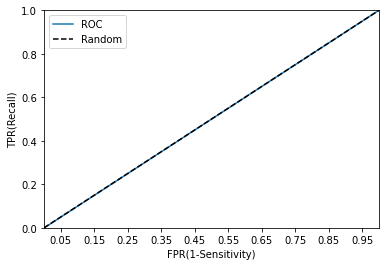

knn ROC AUC값: 0.4996


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [138]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))